In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
dataset= pd.read_csv('gas_turbines.csv')
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

    Variable (Abbr.) Unit Min Max Mean
    Ambient temperature (AT) C â€“6.23 37.10 17.71
    Ambient pressure (AP) mbar 985.85 1036.56 1013.07
    Ambient humidity (AH) (%) 24.08 100.20 77.87
    Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
    Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
    Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
    Turbine after temperature (TAT) C 511.04 550.61 546.16
    Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
    Turbine energy yield (TEY) MWH 100.02 179.50 133.51
    Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
    Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [63]:
dataset.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:xlabel='NOX', ylabel='Density'>

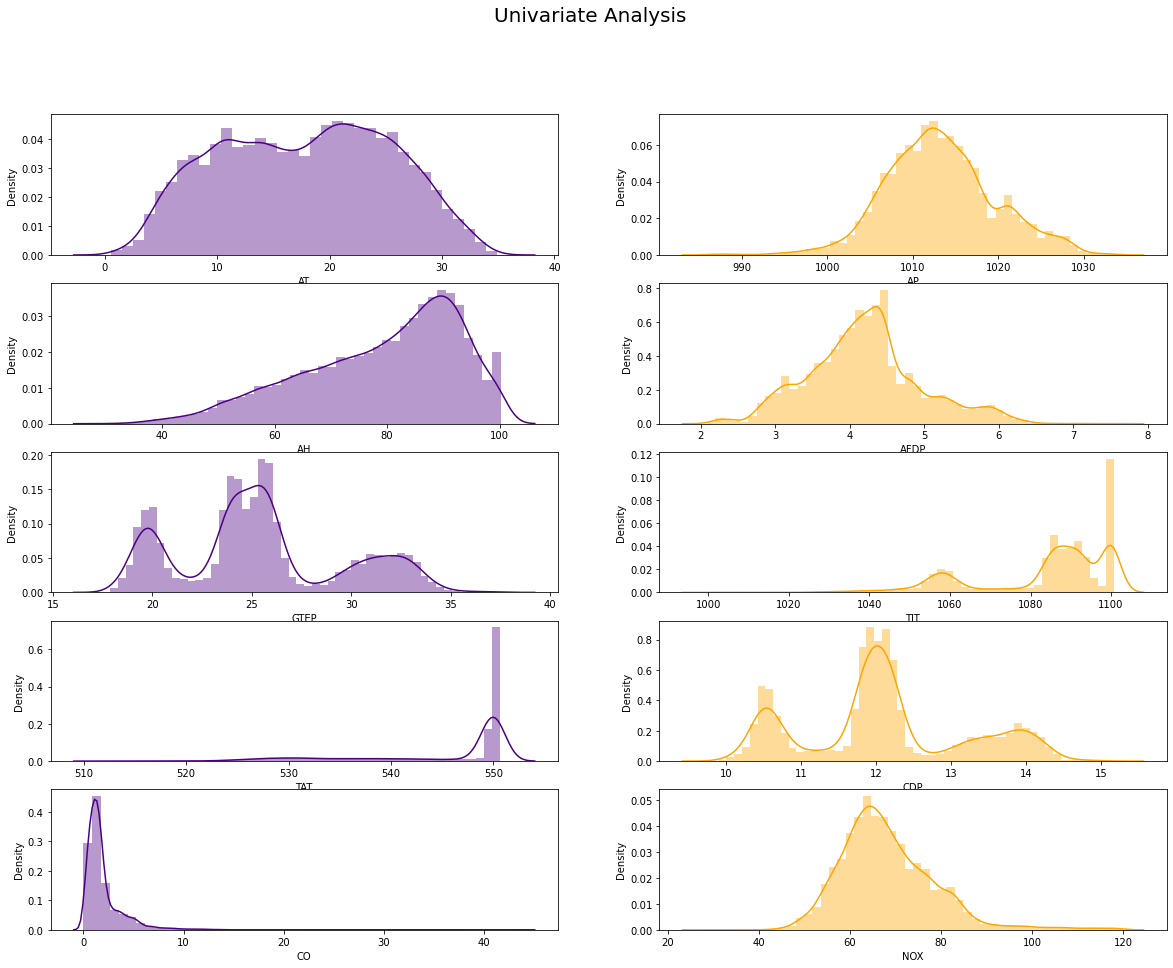

In [64]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(dataset['AT'],ax=axes[0,0],color='indigo')
sns.distplot(dataset['AP'],ax=axes[0,1],color='orange')
sns.distplot(dataset['AH'],ax=axes[1,0],color='indigo')
sns.distplot(dataset['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(dataset['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(dataset['TIT'],ax=axes[2,1],color='orange')
sns.distplot(dataset['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(dataset['CDP'],ax=axes[3,1],color='orange')
sns.distplot(dataset['CO'],ax=axes[4,0],color='indigo')
sns.distplot(dataset['NOX'],ax=axes[4,1],color='orange')

<AxesSubplot:xlabel='TEY', ylabel='Density'>

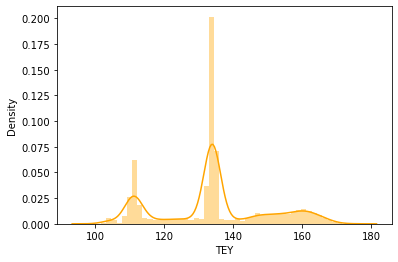

In [65]:
sns.distplot(dataset['TEY'],color='orange')

<AxesSubplot:xlabel='NOX', ylabel='TEY'>

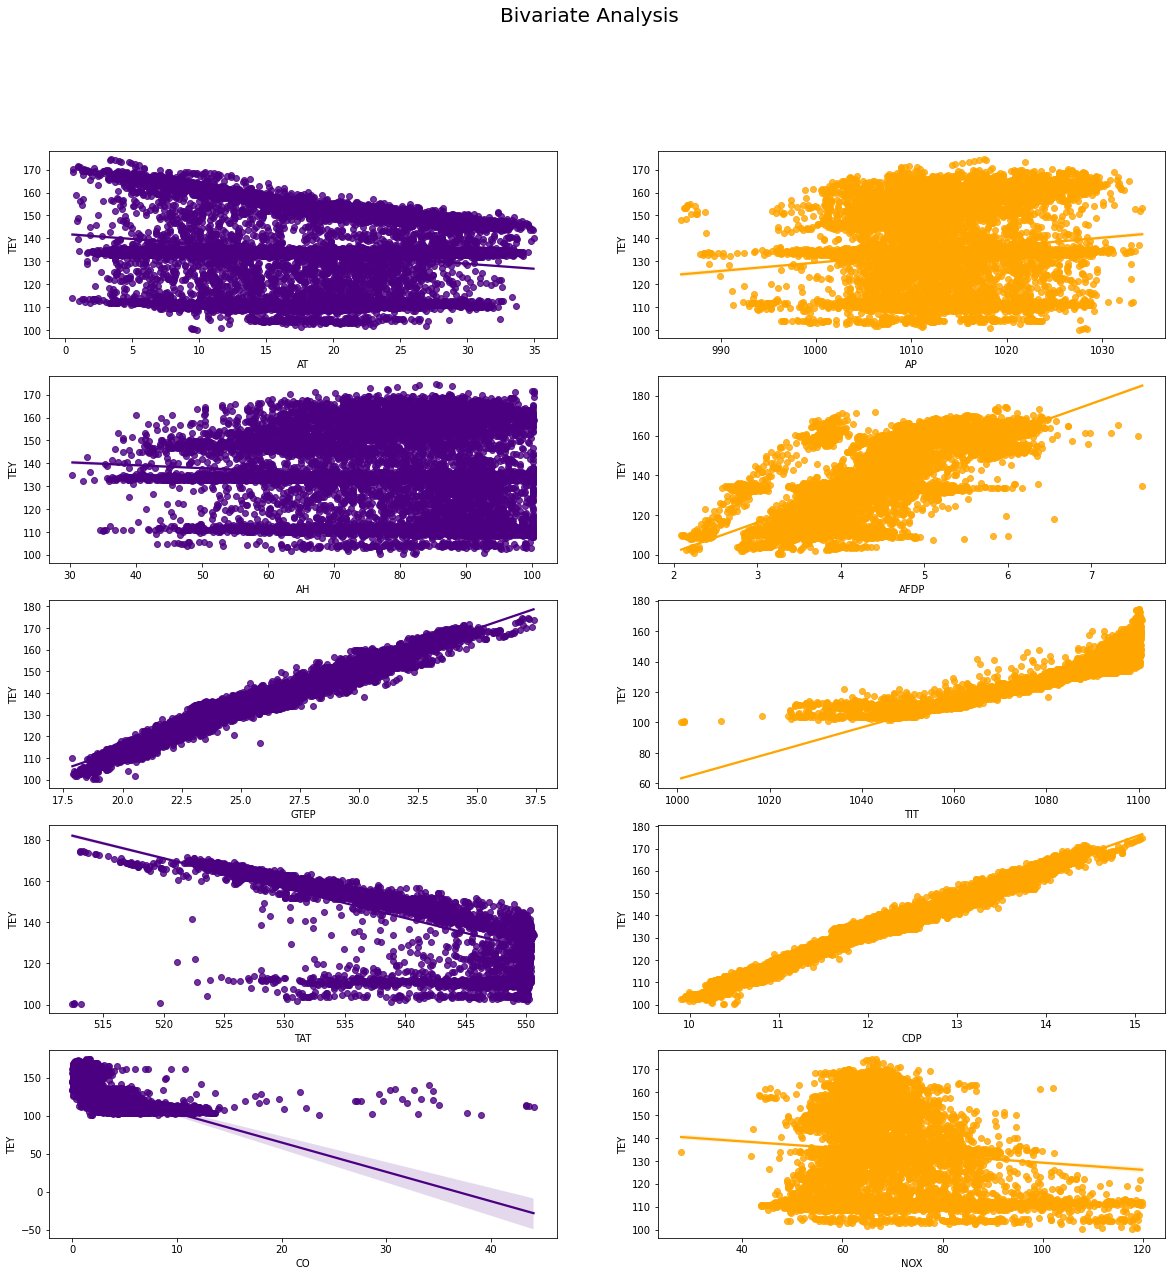

In [66]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x="AT",y="TEY",data=dataset,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",data=dataset,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",data=dataset,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",data=dataset,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",data=dataset,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",data=dataset,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",data=dataset,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",data=dataset,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",data=dataset,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",data=dataset,ax=axes[4,1],color='orange')

In [67]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


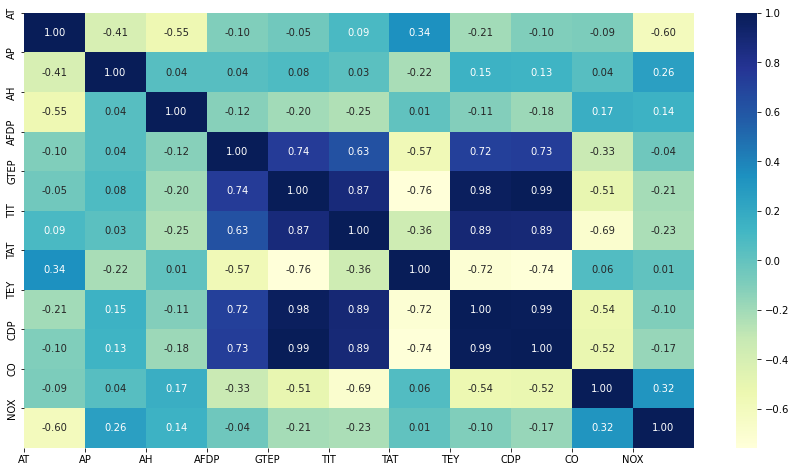

In [68]:
# Heatmap of correlation matrix

corr = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [69]:
X= dataset.drop(['TEY','AT','AP','AH','CO','NOX'],axis=1)
y= dataset.loc[:,['TEY']]

In [70]:
scaler = StandardScaler()
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Importing the necessary packages

from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.optimizers import adam_v2
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [74]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(3, kernel_initializer= 'normal', activation='relu'))
  #model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse'])
  return model

In [75]:
#create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=50, epochs=10...................................
[CV 1/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.042 total time=   3.4s
[CV 2/5; 1/18] START batch_size=50, epochs=10...................................
[CV 2/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.062 total time=   2.3s
[CV 3/5; 1/18] START batch_size=50, epochs=10...................................
[CV 3/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.069 total time=   1.8s
[CV 4/5; 1/18] START batch_size=50, epochs=10...................................
[CV 4/5; 1/18] END ...batch_size=50, epochs=10;, score=-1.022 total time=   1.9s
[CV 5/5; 1/18] START batch_size=50, epochs=10...................................
[CV 5/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.073 total time=   2.2s
[CV 1/5; 2/18] START batch_size=50, epochs=50...................................
[CV 1/5; 2/18] END ...batch_size=50, epochs=50;,

In [76]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.03290274478495121, using {'batch_size': 100, 'epochs': 50}
-0.2535890318453312,0.38422744880526544 with: {'batch_size': 50, 'epochs': 10}
-0.6162205226719379,0.47070797360647276 with: {'batch_size': 50, 'epochs': 50}
-0.42823307365179064,0.468619836111583 with: {'batch_size': 50, 'epochs': 100}
-0.4619733564555645,0.43324622316120553 with: {'batch_size': 100, 'epochs': 10}
-0.03290274478495121,0.009089353849398327 with: {'batch_size': 100, 'epochs': 50}
-0.4311221171170473,0.481767710920702 with: {'batch_size': 100, 'epochs': 100}
-0.7409149765968323,0.3143938425709306 with: {'batch_size': 200, 'epochs': 10}
-0.2352850280702114,0.3819110662170957 with: {'batch_size': 200, 'epochs': 50}
-0.4283594131469727,0.46793123300898987 with: {'batch_size': 200, 'epochs': 100}
-0.9378897190093994,0.07006507836271884 with: {'batch_size': 400, 'epochs': 10}
-0.4446826815605164,0.47096428818266817 with: {'batch_size': 400, 'epochs': 50}
-0.23800893872976303,0.3721123376006902 with: {'batch_si

In [77]:
model= Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer= 'normal', activation='relu'))
model.add(Dense(3, kernel_initializer= 'normal', activation='relu'))
model.add(Dense(1, kernel_initializer= 'normal')) 
adam= Adam(lr=0.001)
# Compile model
model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse'])

In [82]:
history= model.fit(X_train,y_train,epochs=50, batch_size=100)

Epoch 1/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 2/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 3/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 4/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 5/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9984 - mse: 0.9984
Epoch 6/50
101/101 [==============================] - 0s 993us/step - loss: 0.9983 - mse: 0.9983
Epoch 7/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 8/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 9/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 10/50
101/101 [==============================] - 0s 1ms/step - loss: 0.9983 - mse: 0.9983
Epoch 11/50
101/101 [==========================

In [83]:
y_pred= model.predict(X_test)
y_pred

array([[0.00537999],
       [0.00537999],
       [0.00537999],
       ...,
       [0.00537999],
       [0.00537999],
       [0.00537999]], dtype=float32)

In [80]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_test,y_pred)

-0.0005505527946405575